### Pipelines
These are extremely useful tools that offer quick and consistent data transformations and model training.

Once you try and test different steps in a data science workflow, pipelines allow you to intergrate all the steps done from preprocessing with python libraries, preprocessing with custom classes to modelling easily. All the steps are bundled into one instance of the pipeline Class without the hassle of data leakage.


In [4]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'


In [7]:
%%time
import psutil

# Logical cores (includes hyperthreading)
logical_cores = psutil.cpu_count(logical=True)

# Physical cores (real cores)
physical_cores = psutil.cpu_count(logical=False)

print(f"Logical cores: {logical_cores}")
print(f"Physical cores: {physical_cores}")


Logical cores: 8
Physical cores: 4
CPU times: total: 0 ns
Wall time: 2.01 ms


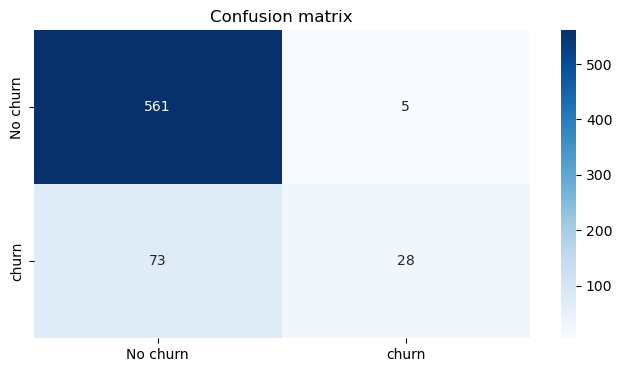

CPU times: total: 938 ms
Wall time: 426 ms


In [8]:
%%time
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from category_encoders import MEstimateEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

#instantiation.
me = MEstimateEncoder(cols='state')
le = LabelEncoder()
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=7)

df = pd.read_csv('./data/churn.csv')

df = df.drop('phone number', axis=1)

df['churn'] = df['churn'].astype(int)



object_columns = ['international plan', 'voice mail plan']


for col in object_columns:
    df[col] = le.fit_transform(df[col])


X = df.drop('churn', axis=1)
y = df['churn']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipe = Pipeline([
    ('MEncoder', me),
    ('scaler', scaler),
    ('knn', knn)
])


pipe.fit(X_train, y_train)

y_preds = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.title('Confusion matrix')
plt.show()

### Hyperparameter Tuning
Non-parametric algorithms such as KNN and Decision Trees come with a some parameters that you can tweak when instantiating them. These are what are referred to as hyperparameters and changing them can come as an improvement or cost to the model itself.

KNN comes with 6 hyperparameters each affecting the model in its own way.

* `n_neighbors` which is the number of neighbors to consider for classification and it defaults to 5.

- `metric` this is a distance metric and affects how the distance between values is calculated('euclidean', 'manhattan', 'minkowski')

- `weights` this is a weight function used in prediction ie 'uniform' where equal weight is given to all neighbors and 'distance' where closer neighbors influence more.

- `p` this one is to be set when you choose the minkowski distance 1 = manhattan and 2 = euclidean

- `algorithm` affects speed/performance(large datasets); 'ball_tree', 'kd_tree', 'auto'(default)

- `leaf_size` if you choose kd_tree then this influences the leaf size(lower size = faster)


Better guide for the algorithm:
| Algorithm   | Description                                                                                          | Best Use Cases                                                                                                                                           |
| ----------- | ---------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `auto`      | Automatically selects the best algorithm based on the data provided.                                 | Default choice. Automatically chooses between `'ball_tree'`, `'kd_tree'`, and `'brute'`. Suitable for most datasets.                                     |
| `ball_tree` | A tree-based algorithm that organizes data into a binary tree structure for efficient querying.      | Large datasets with a high number of features. Excellent for complex, high-dimensional data.                                                             |
| `kd_tree`   | A tree-based algorithm similar to `ball_tree` but designed for data that can be partitioned by axis. | Medium to large datasets with relatively lower dimensions (e.g., ≤ 20 features). Generally faster than `ball_tree` on low-dimensional data.              |
| `brute`     | A brute-force method that compares all points in the dataset.                                        | Small to moderate-sized datasets where memory and computation time aren't major concerns. Best used when there are few features or the dataset is small. |


With numerous combinations of hyperparameters to be tuned, we needed a clean and optimal way of writing that code, so here is where **GridsearchCV** comes in.

It allows us to tune possible combinations of the hyperparameters and finds the best one.

As a bonus you can use the **crossvalidation** within gridsearch by specifying the `cv` parameter.

##### Drawbacks
- Time consuming
- Need to be good at specifying the hyperparameters
- Not a guarantee to improved performance.

This is how we employ both gridsearch and pipelines for optimized and clean code.

In [2]:
###code here



#### Ensemble Methods.
Ensemble methods are a way to stack poor performing models ontop of each other to improve the predictive performance by reducing bias, variance(sometimes both). 

The aggregation of the several models produced make the final prediction more robust and accurate. A good example of this is **Decision Trees**, which is made up of a lot of decision trees and only the best one is chosen as the final one. 

There are two ways of doing ensemble learning:
- **Bootstrapping** - training multiple models on randomised subsets of the data with replacement then prediction is done by finding the average/voting on the models. (example, Random forest)
- **Boosting** - sequential training of models with a focus on errors made by previous one.